In [27]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

(-0.5, 239.5, 239.5, -0.5)

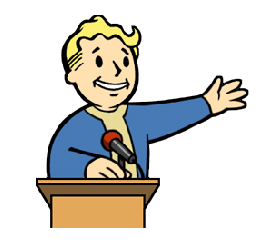

In [28]:
imagen = cv2.imread("boy.png")
rgb= cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)
plt.axis('off')

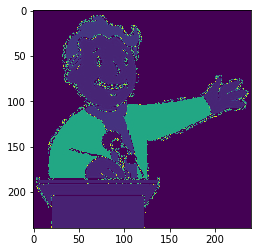

In [107]:
R,G,B= cv2.split(rgb)
R=R/255
G=G/255
B=B/255

x=imagen.shape[0]
y=imagen.shape[1]

r=np.empty([x,y])
g=np.empty([x,y])
b=np.empty([x,y])
H=np.empty([x,y])
S=np.empty([x,y])
I=np.empty([x,y])
for i in range(0, x):
    for j in range(0,y):
        divisor=R[i,j]+G[i,j]+B[i,j]
        if (divisor != 0):
            r[i,j]=R[i,j]/divisor
            g[i,j]=G[i,j]/divisor
            b[i,j]=B[i,j]/divisor
        else:
            r[i,j]=0
            g[i,j]=0
            b[i,j]=0
        
        argum=(R[i,j]-G[i,j])*(R[i,j]-G[i,j])+(R[i,j]-B[i,j])*(G[i,j]-B[i,j])
        num=0.5*((R[i,j]-G[i,j]) + (R[i,j]-B[i,j]))
        
        I[i,j]=divisor/3.0
        if (R[i,j]==G[i,j]) & (G[i,j]==B[i,j]):
            H[i,j]=0
            S[i,j]=0
        else:
            w=num/math.sqrt(argum)
            if (w>1):
                w=1
            if (w<-1):
                w=-1
            H[i,j]=math.acos(w)
            if H[i,j] < 0:
                print('b')
            if B[i,j] > G[i,j]:
                H[i,j]=2*math.pi-H[i,j]
            if (r[i,j] <= g[i,j]) & (r[i,j] <= b[i,j]): 
                S[i,j]=1-3*r[i,j]
            if (g[i,j] <= r[i,j]) & (g[i,j] <= b[i,j]): 
                S[i,j]=1-3*g[i,j]
            if (b[i,j] <= r[i,j]) & (b[i,j] <= g[i,j]): 
                S[i,j]=1-3*b[i,j]
                           
H.astype(np.uint8)
plt.imshow(H)

In [25]:
r+g+b

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

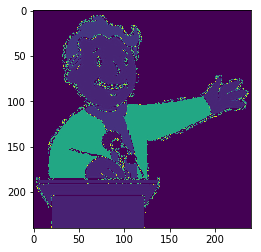

In [108]:
hsv= cv2.cvtColor(imagen, cv2.COLOR_BGR2HSV)
h2,s2,v2 = cv2.split(hsv)
h2.astype(np.uint8)
plt.imshow(h2)